# Global Shark Attack File Analysis
The Shark Research Institute (SRI) maintains a log of shark attacks worldwide, the Global Shark Attack File (GSAF). It is continually updated as new incidents occur, and was started in 1992 by the SRI. The purpose of the GSAF is to "use forensic analysis to demonstrate and emphasize the likelihood of shark/human interactions in comparison to the myriad dangers that we face in our daily lives. With a better understanding of these interactions we can minimize the possibility of being injured by a shark, and shift the discussion from fear to conservation of all shark species worldwide", per the SRI/GSAF website https://www.sharks.org/global-shark-attack-file)

The current log file, in Excel form, can be downloaded from the "chronoligically" link at the site below:

https://www.sharks.org/global-shark-attack-file

The goal of this project to clean and analyze shark incidents worldwide. Some of the areas of interest in this project are type of incident (provoked or unprovoked), fatalities, the shark species involved and activity of the human.

In [47]:
#importing the needed libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [48]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xlsx to GSAF5 (1).xlsx


In [49]:
import io  
df = pd.read_excel(io.BytesIO(uploaded['GSAF5.xlsx']))
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6461 non-null   object 
 2   Year                    6459 non-null   float64
 3   Type                    6457 non-null   object 
 4   Country                 6411 non-null   object 
 5   Area                    5999 non-null   object 
 6   Location                5917 non-null   object 
 7   Activity                5910 non-null   object 
 8   Name                    6247 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6433 non-null   object 
 12  Fatal (Y/N)             5915 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

From this dataset, we can see that there are 6,262 records/entries on Global Shark Attacks in the world. We can also see that most columns do have some missing data. Not too surprising for this dataset, since there are often unknown/unverifiable circumstances regarding shark attacks. 

So we'll start by removing several irrelevant columns in the dataset, looking at the Case Numbers, Year, Type of attack, and Country

In [51]:
#dropping irrelevant columns

df.drop(['Case Number.1', 'Case Number.2','Unnamed: 22','Unnamed: 23','href formula', 'href' ], axis= 1, inplace= True)
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'original order'],
      dtype='object')

We've already established there are lots of missing data in our dataset. So, let's try to get a quick overview of the all the columns affected by this problem

In [52]:
#Checking for missing data
df.isna().sum()

Case Number                  2
Date                         1
Year                         3
Type                         5
Country                     51
Area                       463
Location                   545
Activity                   552
Name                       215
Unnamed: 9                6434
Age                       2871
Injury                      29
Fatal (Y/N)                547
Time                      3392
Species                   2924
Investigator or Source      19
pdf                       3396
original order            3400
dtype: int64

In [53]:
# Remove these two rows with Missing Data in Case Number column, since there doesn't appear to be much data to work with
df[df['Case Number'].isnull()== True]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order
4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5646,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,NaN,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",NaN,NaN


In [54]:
df = df[df['Case Number'].isnull()== False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6460 entries, 0 to 6461
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6460 non-null   object 
 2   Year                    6458 non-null   float64
 3   Type                    6456 non-null   object 
 4   Country                 6410 non-null   object 
 5   Area                    5998 non-null   object 
 6   Location                5916 non-null   object 
 7   Activity                5909 non-null   object 
 8   Name                    6246 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6432 non-null   object 
 12  Fatal (Y/N)             5914 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

Our data has been reduced to 6,460 entries because we've removed two rows from 'Case Number' which has missing data

In [55]:
#Evaluating the year column

df['Year'].value_counts(dropna = False)

2015.0    143
2017.0    138
2016.0    130
2011.0    128
2014.0    127
         ... 
1816.0      1
500.0       1
1771.0      1
1554.0      1
1791.0      1
Name: Year, Length: 253, dtype: int64

Upon reviewing of the Year column, we'll notice that some years ( 0.0, 500.0, 3019.0) have questionable entries. More so, the year data are dated as far back as the 1500s,1700s & 1800s. So based on the Year Column, We will reduce the scope of the entries to 1900; a year which I'd like to think of as a more mordern era.

In [56]:
# Reducing the scope of the Year entries to 1900 and coverting the datatype from float to integer
df = df[df['Year'] >= 1900]
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 5721
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5718 non-null   object 
 1   Date                    5718 non-null   object 
 2   Year                    5718 non-null   int64  
 3   Type                    5715 non-null   object 
 4   Country                 5694 non-null   object 
 5   Area                    5398 non-null   object 
 6   Location                5338 non-null   object 
 7   Activity                5276 non-null   object 
 8   Name                    5547 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3498 non-null   object 
 11  Injury                  5699 non-null   object 
 12  Fatal (Y/N)             5248 non-null   object 
 13  Time                    2971 non-null   object 
 14  Species                 3354 non-null   

The dataset has now further been reduced to 5718 entries. We'll now evaluate the Type column which has 3 missing data

In [57]:
#Evaluating the Type column

df['Type'].value_counts(dropna=False)

Unprovoked             4163
Provoked                557
Invalid                 481
Sea Disaster            186
Watercraft              113
Boat                    109
Boating                  92
Questionable             10
NaN                       3
Under investigation       1
Boatomg                   1
Unverified                1
Unconfirmed               1
Name: Type, dtype: int64

Let's further explore the 3 missing values in Type column to see if we can unravel any possible information about them

In [58]:
df[df['Type'].isnull() == True]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order
239,2017.09.15.a,15-Sep-2017,2017,NaN,SAMOA,Upolu Island,Nofoali’i,Fishing,male,NaN,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",NaN,NaN
537,2015.07.27,27-Jul-2015,2015,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,NaN,40,Injury to hand,NaN,NaN,NaN,NaN,NaN,NaN
5025,1936.09.11.R,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,NaN,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",NaN,NaN


After reviewing the 3 missing values from the Type column, there isn't enough information we could use to infer if the victims 
were attacked due to any sort of direct provocation on the shark. To guide our judgement here, It's imperative to understand the
following terms:

** Unprovoked Attack: An unprovoked attack is one where the victim was not interacting with or actively pursuing a shark such as
a surfer being bitten while sitting on a surfboard. 

** Provoked Attack: A provoked attack is one where the victim was purposefully interacting with a shark, such as shark fishing or
divers trying to touch a shark.

Without any metadata available from the GSAF website, it's unclear what some of these 'Types' refer to. 
For example, 'Invalid'? Not sure what that means, along with 'Boatomg', 'Unverified' and others. For this analysis we will
combine the following Types: 'Boat', 'Boating', 'Boatomg', and 'Watercraft'. They will all be changed to 'Boat'. 

Likewise, the 3 null values, plus 'Questionable', 'Unverified' and 'Under Investigation' will be combined with Unconfirmed

In [59]:
df['Type'].replace({'Boating': 'Boat', 'Boatomg': 'Boat', 'Watercraft':'Boat',  'Questionable':'Unconfirmed', 'Unverified':'Unconfirmed','Under investigation':'Unconfirmed'}, inplace = True)

# Replacing the null "Type" values with 'Unconfirmed' value

df['Type'].fillna('Unconfirmed', inplace = True)
df['Type'].value_counts()

Unprovoked      4163
Provoked         557
Invalid          481
Boat             315
Sea Disaster     186
Unconfirmed       16
Name: Type, dtype: int64

Not exactly sure what 'Invalid' means, perhaps it can probably be classified as an Unknown or Unconfirmed case

In [60]:
# Calculate the percentage of each shark incident type
df['Type'].value_counts(normalize=True)*100


Unprovoked      72.805177
Provoked         9.741168
Invalid          8.412032
Boat             5.508919
Sea Disaster     3.252886
Unconfirmed      0.279818
Name: Type, dtype: float64

Since the year 1900 we've had sharks attack its vitcims unprovoked 72.8% of the time. Shark attack due to provocation occured 9.7% of the time. Boat and other water activities led to shark attack 5.5% of the time. More so, shark attack due to Sea diaster or accident is quite low with 3.3% incidence rate.
There are 0.1% unconfirmed case; however, if we're to presume that Invalid = Unconfirmed, then it's safe to say that there are 8.6% unconfirmed shark attack cases since 1900

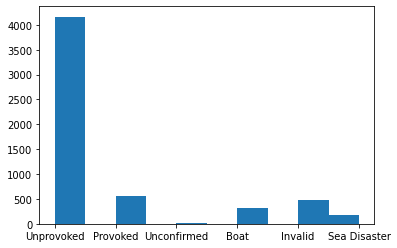

In [61]:
plt.hist(df['Type'])
plt.show()

## Fatality Since 1900

we'll evaluate human fatality from shark attack since 1900

In [62]:
df['Fatal (Y/N)'].value_counts()

N          4151
Y          1038
UNKNOWN      55
F             2
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

The top 2 values are as they should be (Y or N). Ordinarily, we're suppose to have just 'Y' (Yes), 'N' (No), and perhaps UNKNOWN (for unidentified fatality case) as entries in the Fatal (Y/N) column.

However, we have 3 errorneous entries such as: 'F' and 'M' -- which I suppose could be the gender of victims fattaly attacked by sharks, and '2017' which could be the year a shark attack occured. These 3 values are all misfits in that column, so we'll have to evaluate all the affected rows just to see if anything stands out, otherwise we'll convert them to 'UNKNOWN'.

In [63]:
df[(df['Fatal (Y/N)'] == 'F') | (df['Fatal (Y/N)'] == 'M') | (df['Fatal (Y/N)'] == '2017')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order
17,2019.12.12,12-Dec-2019,2019,Unconfirmed,REUNION ISLAND,NaN,NaN,Kayaking,NaN,M,70,Partial remains recovered 12/26/2019 from shark,F,NaN,3.4 m tiger shark,"Clicanoo, 12/27/2019",2019.12.12-ReunionIsland.pdf,6487.0
22,2019.11.23,23-Nov-2019,2019,Unconfirmed,AUSTRALIA,Queensland,"Elliot Head, near Bundaberg.",Spearfishing,Andrew Page,M,38,Believed to have drowned. Partial remains wash...,F,NaN,NaN,"B. Myatt, GSAF",2019.11.23-Page.pdf,6482.0
440,2016.04.18.b,18-Apr-2016,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,NaN,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",NaN,NaN
941,2012.06.10,10-Jun-2012,2012,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,NaN,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",NaN,NaN


By investigating the 'Injury' column, we can deduce that were 2 fatal and 2 non fatal incidence.

The victim on row 22 was believed to have drowned due to a shark attack; although his remains wasn't recovered.
The victim on row 17 died and his partial remains was recovered from the shark that attacked him.
The victims on row 440 and 941 were both attacked by a shark but they escaped death with severe injury.

We'll change row 17 and 22 to "Y", and 440 & 941 to "N". Also, we will change the 470 null values in the Fatal (Y/N) column to "UNKNOWN".

In [64]:
df['Fatal (Y/N)'].replace({'M':'N', '2017': 'N'}, inplace = True)
df.at[17, 'Fatal (Y/N)'] = 'Y'
df.at[22, 'Fatal (Y/N)'] = 'Y'
df['Fatal (Y/N)'].fillna('UNKNOWN', inplace = True)
df['Fatal (Y/N)'].value_counts(dropna=False)

N          4153
Y          1040
UNKNOWN     525
Name: Fatal (Y/N), dtype: int64

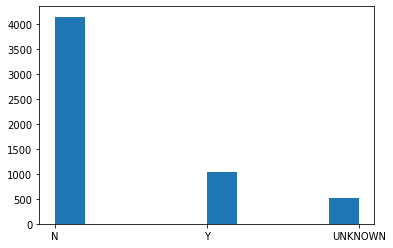

In [65]:
#Vizualize Fatality

plt.hist(df['Fatal (Y/N)'])
plt.show()

In [66]:
df['Fatal (Y/N)'].value_counts(normalize = True)

N          0.726303
Y          0.181882
UNKNOWN    0.091815
Name: Fatal (Y/N), dtype: float64

Since 1900, aproximately 73% of shark attacks have been Non-Fatal, 18% of the attacks were Fatal, and while about 9% are unknown. Let's see if fatality rate is dependent upon the country.

**Fatality by Country**

Let's evaluate if fatal shark attacks are pevalent some certain countries than others. Do certain countries have a higher fatality occurrence than others? We'll explore the fatalities of the top 30 countries. 

Unless we review the Fatal (Y/N) column line by line in more detail, we won't be able to accurately identify which of the 525 'UNKNOWN' entries should be marked as fatal or non-fatal. Therefore, we will slightly intoduce our bias by underestimating all 525 'UNKNOWN' entries; which is about 20% of the fatality data, by assuming all to be non-fatal.

We will start by making a new column, named 'Fatal' and fill it with a 1, if fatal, and 0 if non-fatal or unknown.

In [67]:
## Make a new column and map a 'Y' from Fatal to 1 and 'N' & 'UNKNOWN' to 0
df['Fatal'] = df['Fatal (Y/N)'].map({'Y': 1, 'N': 0, 'UNKNOWN': 0})
df['Fatal'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: Fatal, dtype: int64

In [68]:
#Evaluate the new column to confirm that the counts are correct
df['Fatal'].value_counts()

0    4678
1    1040
Name: Fatal, dtype: int64

The new 'Fatal' column has the correct number of fatalities, at 1040. Adding the original non-fatalities (4153) and unknowns (525) from the original 'Fatal (Y/N)' column, we get the same number as the new column (4678)

In [69]:
# Create a dataframe that gets the sum of each incidents that resulted to fatality by country
Fatal_sum = df.groupby('Country')['Fatal'].sum()
Fatal_sum_df = pd.DataFrame(Fatal_sum)
Fatal_sum_df.columns = ['Total Fatal']
Fatal_sum_df.reset_index(inplace=True)

# Create a count dataframe to get the number of incidents that occured in each country
count = df.groupby('Country')['Fatal (Y/N)'].count()
count_df = pd.DataFrame(count)
count_df.columns = ['Total Attack']
count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
Fatality_df = pd.merge(count_df, Fatal_sum_df, how = 'left', on = 'Country')
print(Fatality_df) 

                        Country  Total Attack  Total Fatal
0             ADMIRALTY ISLANDS             1            0
1                AMERICAN SAMOA             3            3
2    ANDAMAN / NICOBAR ISLANDAS             1            1
3                        ANGOLA             1            0
4                       ANTIGUA             1            0
..                          ...           ...          ...
167                     VANUATU            11            7
168                   VENEZUELA             9            3
169                     VIETNAM            12            1
170               WESTERN SAMOA             1            1
171                       YEMEN             4            2

[172 rows x 3 columns]


In [70]:
# Create a new column (Fatality Rate) and Calcualate the fatility rate by country
Fatality_df['Fatality Rate'] = Fatality_df['Total Fatal'] / Fatality_df['Total Attack']
print(Fatality_df)

                        Country  Total Attack  Total Fatal  Fatality Rate
0             ADMIRALTY ISLANDS             1            0       0.000000
1                AMERICAN SAMOA             3            3       1.000000
2    ANDAMAN / NICOBAR ISLANDAS             1            1       1.000000
3                        ANGOLA             1            0       0.000000
4                       ANTIGUA             1            0       0.000000
..                          ...           ...          ...            ...
167                     VANUATU            11            7       0.636364
168                   VENEZUELA             9            3       0.333333
169                     VIETNAM            12            1       0.083333
170               WESTERN SAMOA             1            1       1.000000
171                       YEMEN             4            2       0.500000

[172 rows x 4 columns]


Let's now check the fatality for the top 30 countries

In [71]:
# Isolate the top 30 countries attacked by shark based on 'Total Attack' column
Top30 = Fatality_df.sort_values(by=['Total Attack'], ascending=False, ignore_index=True)[:30]
print(Top30)

             Country  Total Attack  Total Fatal  Fatality Rate
0                USA          2161          133       0.061546
1          AUSTRALIA          1216          223       0.183388
2       SOUTH AFRICA           555           87       0.156757
3   PAPUA NEW GUINEA           131           55       0.419847
4             BRAZIL           109           35       0.321101
5            BAHAMAS           106            6       0.056604
6        NEW ZEALAND           104           12       0.115385
7             MEXICO            84           36       0.428571
8              ITALY            61            9       0.147541
9        PHILIPPINES            58           33       0.568966
10           REUNION            58           28       0.482759
11     NEW CALEDONIA            54           17       0.314815
12              FIJI            50           18       0.360000
13        MOZAMBIQUE            41           18       0.439024
14             EGYPT            34           10       0

In [72]:
# Sorting the top 30 countries based on the shark incident fatality rate
Top30.sort_values(by=['Fatality Rate'], ascending=False, ignore_index=True)

,Country,Total Attack,Total Fatal,Fatality Rate
0,HONG KONG,24,17,0.708333
1,INDONESIA,19,11,0.578947
2,PHILIPPINES,58,33,0.568966
3,CROATIA,27,14,0.518519
4,GREECE,14,7,0.500000
5,REUNION,58,28,0.482759
6,PANAMA,27,13,0.481481
7,JAMAICA,19,9,0.473684
8,COSTA RICA,17,8,0.470588
9,CUBA,31,14,0.451613


Of the top 30 countries in terms of number of recorded attacks, Hong Kong has the highest fatality rate at about 71%, followed by Indonesia (58%) and Philippines (57%). French Polynesia, with 24 attacks, had the lowest fatality rate at 0%. 

With the highest number of attacks (2161), the United States had the third lowest fatality rate at just 6%.

An interesting observation from this dataset is, only 3 countries from Africa are in the top 30 - South Africa (555), Mozambique (41), and Egypt(34). I expected that a few other countries from Africa could be on this list. Could it be that sharks are endangered in most parts of Africa? Or perhaps, it could be the case of shark attacks incidence being under reported in Africa.



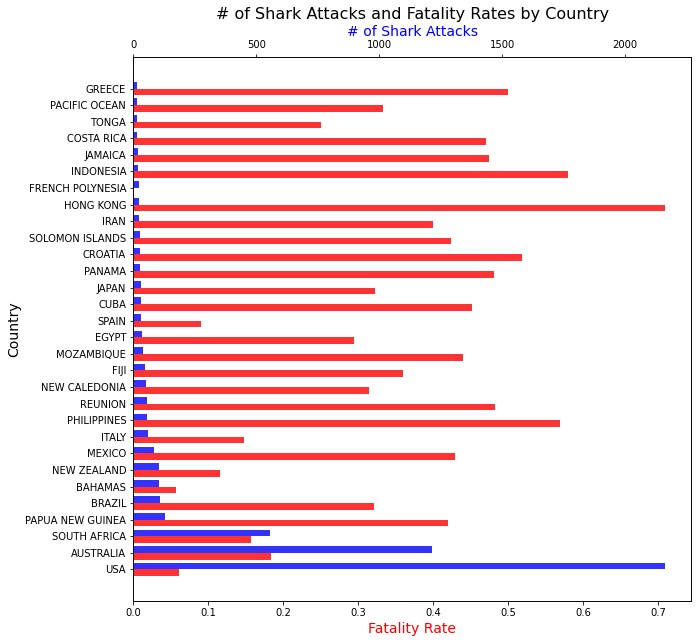

In [73]:
# Create a chart with the number of attacks and fatality rates of the top 30 countries for visualization purposes

fig,ax = plt.subplots(figsize=(10,10))
ax.barh(Top30['Country'], Top30['Fatality Rate'],color="red", alpha=0.8, height=-0.4, align='edge')
ax.set_xlabel("Fatality Rate",color="red",fontsize=14)
ax.set_ylabel("Country",fontsize=14)
ax2=ax.twiny()
ax2.barh(Top30['Country'], Top30['Total Attack'], color="blue", alpha=0.8, height=0.4, align='edge')
ax2.set_xlabel("# of Shark Attacks",color="blue",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Country', fontsize=16)
plt.show()

**Shark Species Involvement**

At first glance, the GSAF dataset had quite a variety of values in the shark species column. Let's look to see if there are any patterns. First, we'll take a look at the data for South Africa, since it's the African country with the highest recored attacks. There have been over 500 attacks recorded and about a 16% fatality rate.

In [74]:
# Isolate the South Africa dataset
SA = df[df['Country'] == 'SOUTH AFRICA']
SA.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 13 to 5721
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             555 non-null    object 
 1   Date                    555 non-null    object 
 2   Year                    555 non-null    int64  
 3   Type                    555 non-null    object 
 4   Country                 555 non-null    object 
 5   Area                    550 non-null    object 
 6   Location                547 non-null    object 
 7   Activity                515 non-null    object 
 8   Name                    544 non-null    object 
 9   Unnamed: 9              2 non-null      object 
 10  Age                     366 non-null    object 
 11  Injury                  554 non-null    object 
 12  Fatal (Y/N)             555 non-null    object 
 13  Time                    347 non-null    object 
 14  Species                 417 non-null    

In [75]:
# list the first 20 records for 'Species'
print(SA['Species '].head(20))

13                                                NaN
28                                   White shark, 4 m
66                              White shark, juvenile
100                                       2.5 m shark
105                                               NaN
119                                   White shark, 3m
166                                               NaN
176                                White shark, 2.5 m
186                                       White shark
191                                    Blacktip shark
229               Death may have been due to drowning
238                                               NaN
245                                               NaN
277                                White shark, 2.5 m
301                                               NaN
313    Shark involvement prior to death not confirmed
333                                       Tiger shark
347                                  White shark, 4 m
413                         

In the first 20 records for South Africa attacks, we can see 9 instances of a White shark being involved. However, the data is not formatted consistently. The good news is that "White shark" is consistently noted, sometimes with other information, such as approximate length. Now, let's take a look at the 'Species ' information for the USA.

In [76]:
USA = df[df['Country'] == 'USA']
print(USA['Species '].head(20))


0                 Tiger shark
4                         NaN
15                        NaN
19        10'-12' tiger shark
20    Juvenile blacktip shark
26    4' to 5' blacktip shark
31             4' to 5' shark
34                        NaN
36                        NaN
37             Juvenile shark
39             6' to 7' shark
40                        NaN
41                   2' shark
42                        NaN
43                        NaN
45                Nurse shark
46                        NaN
47                 6.5' shark
48                        NaN
49                        NaN
Name: Species , dtype: object


In [77]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 5720
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             2161 non-null   object 
 1   Date                    2161 non-null   object 
 2   Year                    2161 non-null   int64  
 3   Type                    2161 non-null   object 
 4   Country                 2161 non-null   object 
 5   Area                    2159 non-null   object 
 6   Location                2124 non-null   object 
 7   Activity                2037 non-null   object 
 8   Name                    2131 non-null   object 
 9   Unnamed: 9              6 non-null      object 
 10  Age                     1545 non-null   object 
 11  Injury                  2156 non-null   object 
 12  Fatal (Y/N)             2161 non-null   object 
 13  Time                    1430 non-null   object 
 14  Species                 1313 non-null   

Of the 2161 records for the USA, only 1313 have actual information in the 'Species ' column. Of the first 20 records, only a few have a species listed. Let's remove the nulls from the USA data and re-look

In [78]:
# Isolate the non-null values for Species in the USA dataset
usa = USA[USA['Species '].isnull() == False]
print(usa['Species '].head(20))

0                                           Tiger shark
19                                  10'-12' tiger shark
20                              Juvenile blacktip shark
26                              4' to 5' blacktip shark
31                                       4' to 5' shark
37                                       Juvenile shark
39                                       6' to 7' shark
41                                             2' shark
45                                          Nurse shark
47                                           6.5' shark
51                                     10' to 12' shark
56                                   Blacktip shark, 5'
60                            Blacktip or Spinner shark
61                                      Sandtiger shark
64                                            shark pup
73                                 Bull shark, 4' to 5'
81    Shark involvement unconfirmed but considered p...
82                                             8

After removing the null data from the USA Species column, there are several different shark species listed, including Tiger, Nurse, Blacktip, Juvenile, Sand Tiger, and Bull sharks. Assuming this information is accurate, we'll try to cleanup the 'Species ' information for the entire dataset

**Cleaning and Organizing the Species Column**

We'll start cleaning and organizing the species column. The main goal will be to extract the species listed, but there are many records with just a length or some general comment. These will be changed to unknown, along with any nulls.

In [79]:
# Replace null values for Species with 'Unknown' and split the 'Species' string for further analysis
df['Species '].fillna('unknown', inplace=True)
df['species'] = df['Species '].str.lower().str.replace('\"','').str.replace('\?','').str.replace('questionable','unknown').str.replace("\'",'').str.replace('.','').str.split()
print(df['species'].head(20))
print(df['species'].tail(20))

0                                        [tiger, shark]
1                                             [unknown]
2                                     [a, small, shark]
3                       [broadnose, seven, gill, shark]
4                                             [unknown]
5                                             [unknown]
6                                        [lemon, shark]
7                                        [white, shark]
8                                             [unknown]
9                                             [unknown]
10    [shovelnose, shark, which, is, a, ray,, not, a...
11                                            [unknown]
12                                            [unknown]
13                                            [unknown]
14                                            [unknown]
15                                            [unknown]
16                                       [white, shark]
17                                [34, m, tiger,

We'll piece back together some of the individual words from the species column. Those with a number of words greater than 4 will be ignored. There are too many options to review for those. Those under 4 words will be combined for further analysis.

In [80]:
# Function to concatenate the split words in the species column
def shark_name(my_list):
    if len(my_list) >= 4:
        return 'very long'
    elif len(my_list) == 3:
        return str(my_list[-3] + ' ' + my_list[-2] + ' ' + my_list[-1])
    elif len(my_list) == 2:
        return str(my_list[-2] + ' ' + my_list[-1])
    else:        
        return 'unknown'

df['Species'] = df['species'].apply(shark_name)
df['Species'].unique()

array(['tiger shark', 'unknown', 'a small shark', 'very long',
       'lemon shark', 'white shark', '10-12 tiger shark',
       'juvenile blacktip shark', '5 blacktip shark', '10 tiger shark',
       'oceanic whitetip shark', '7 shark', 'juvenile shark',
       '1+ m shark', '2 shark', '14 white shark', 'nurse shark',
       '65 shark', 'blacktip shark, 5', 'sandtiger shark',
       'white shark, 3m', 'shark pup', 'white shark, juvenile',
       'bull shark pup', '8 shark', 'cookiecutter shark',
       'sand tiger shark', '12 shark', '4 shark', 'spinner shark',
       '25 m shark', 'bull shark', 'wobbegong shark', 'white shark, 46m',
       'mako shark, 7', 'bronze whaler 25m', '5 shark', 'reef shark',
       'salmon shark, juvenile', 'nurse shark, 5', '2 m shark',
       'tiger shark, 3m', 'lemon shark, 3', 'bull shark, 6',
       'grey reef shark', 'invalid incident', '3 m shark', '6 shark',
       'juvenile bull shark', 'tiger shark, 12', '35 m shark',
       '18 m shark', 'blacktip

Many of the sharks involved have been cleaned up, but there's still quite a bit of variety. A lot of them include some sort of measurement, and some have shark names that are more than 2 words (ex. - tawny nurse shark and bronze whaler shark).

In [81]:
# Updated look at the most common results for the shark species involved
df['Species'].value_counts()

unknown                   2488
very long                 1858
white shark                164
tiger shark                 82
bull shark                  53
                          ... 
9-foot shark                 1
5m shark                     1
500-lb shark                 1
nurse shark, 6               1
raggedtooth shark, 25m       1
Name: Species, Length: 356, dtype: int64

In [82]:
# Manually create a list of shark species commonly seen in the species column
sharks = ['white shark', 'bull shark', 'tiger shark', 'hammerhead shark', 'grey nurse shark', 'tawney nurse shark'
         'bronze whaler shark', 'tawny nurse shark', 'nurse shark', 'sand tiger shark', 'oceanic whitetip shark', 
         'whitetip reef shark', 'thresher shark', 'caribbean reef shark', 'blue shark', 'lemon shark', 
         'spinner shark', 'wobbegong', 'sandtiger shark', 'blacktip shark', 'porbeagle shark', 'mako shark', 
         'salmon shark', 'sandbar shark', 'zambesi shark', 'goblin shark', 'raggedtooth shark', 'port jackson shark', 
         'cow shark', '7-gill shark', 'silky shark', 'galapagos shark', 'grey reef shark', 'cookiecutter shark',
         'seven gill shark']

# Create a function to populate a new column named, 'Species ID', with the appropriate species name
def shark_id(a_list):
    for s in sharks:
        if s in a_list:
            return s
    return 'TBD'

df['Species ID'] = df['Species'].apply(shark_id)
df['Species ID'].value_counts()


TBD                       4965
white shark                222
tiger shark                143
bull shark                  93
wobbegong                   38
nurse shark                 34
blacktip shark              32
blue shark                  28
mako shark                  23
lemon shark                 20
raggedtooth shark           19
zambesi shark               15
hammerhead shark            15
spinner shark               13
grey nurse shark            13
oceanic whitetip shark       9
grey reef shark              6
caribbean reef shark         5
galapagos shark              4
porbeagle shark              3
cookiecutter shark           3
salmon shark                 3
7-gill shark                 3
goblin shark                 2
sandbar shark                2
silky shark                  1
whitetip reef shark          1
cow shark                    1
thresher shark               1
tawny nurse shark            1
Name: Species ID, dtype: int64

Not the easiest way, but putting together the list of sharks identified attacks helped get an idea of which sharks have been involved the most in recorded attacks. There is some cleanup still to do, because regional differences in common shark names is prevalent. For example, the sandtiger, raggedtooth, and grey nurse shark all refer to the same species. As does the zambesi and bull sharks (along with other names). Additionally, there are several types of hammerhead sharks, yet this dataset does not seem to have much differentiation of those species.

Per the Florida Museum's webpage regarding bull sharks, https://www.floridamuseum.ufl.edu/discover-fish/species-profiles/carcharhinus-leucas/, "It is known by many different common names throughout its range including requin bouledogue in French speaking countries; Tiburon sarda in Spain; Zambezi shark, Van Rooyen’s shark in South Africa; The Ganges shark in India (though this name is also given to the freshwater river shark Glyphis gangeticus); The Nicaragua shark in Central America; The freshwater whaler, estuary whaler, and Swan River whaler in Australia; The shovelnose shark, square-nose shark, river shark, slipway grey shark, ground shark, and cub shark in various English speaking parts of the world."

In hindsight, using the scientific names for the different shark species would be ideal for limiting the regional naming issues. However, that information is not available in this dataset. Another issue is the exact identification of the shark. Many species are very similar in body shape, color, size, etc. so exact identification would be difficult for most witnesses.

In [83]:
# Combine some of the different spelling or local names for the same shark species
change_names = {'seven gill shark':'7-gill shark', 'zambesi shark':'bull shark', 'grey nurse shark':'raggedtooth shark'}
df['Species ID'].astype(str)
df['Species ID'].replace(change_names, value=None, inplace=True)
df['Species ID'].value_counts()

TBD                       4965
white shark                222
tiger shark                143
bull shark                 108
wobbegong                   38
nurse shark                 34
raggedtooth shark           32
blacktip shark              32
blue shark                  28
mako shark                  23
lemon shark                 20
hammerhead shark            15
spinner shark               13
oceanic whitetip shark       9
grey reef shark              6
caribbean reef shark         5
galapagos shark              4
porbeagle shark              3
cookiecutter shark           3
salmon shark                 3
7-gill shark                 3
goblin shark                 2
sandbar shark                2
silky shark                  1
whitetip reef shark          1
cow shark                    1
thresher shark               1
tawny nurse shark            1
Name: Species ID, dtype: int64

The fact that the white shark, tiger shark and bull shark are at the top of the list in terms of number of attacks is not surprising. What is a bit surprising is the wobbegong and nurse shark in the top 6. Those species of shark are normally known for being on the more sluggish/slow moving side that spend quite a bit of their time resting on the seafloor. Yet, they have more attacks attributed to them than some of the more "agressive" sharks, such as the oceanic white tip.

In [84]:
# Isolating the known species names and excluding those that were TBD/unknown
shark_id = df[df['Species ID'] != 'TBD']
print(shark_id.head())
shark_id.shape

   Case Number         Date  ...            Species   Species ID
0   2020.02.05  05-Feb-2020  ...        tiger shark  tiger shark
6   2020.01.07  07-Jan-2020  ...        lemon shark  lemon shark
7   2020.01.05  05-Jan-2020  ...        white shark  white shark
16  2019.12.20  20-Dec-2019  ...        white shark  white shark
19  2019.12.03  03-Dec-2019  ...  10-12 tiger shark  tiger shark

[5 rows x 22 columns]


(753, 22)

In [85]:
# Create a fatality dataframe by species
species_fatal = df.groupby('Species ID')['Fatal'].sum()
species_fatal_df = pd.DataFrame(species_fatal)
species_fatal_df.columns = ['Fatal']
species_fatal_df.reset_index(inplace=True)

# Create a count of incidents dataframe by species
species_count = df.groupby('Species ID')['Fatal'].count()
species_count_df = pd.DataFrame(species_count)
species_count_df.columns = ['Count']
species_count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
species_fatal_df = pd.merge(species_fatal_df, species_count_df, how = 'left', on = 'Species ID')
print(species_fatal_df)

                Species ID  Fatal  Count
0             7-gill shark      0      3
1                      TBD    928   4965
2           blacktip shark      0     32
3               blue shark      5     28
4               bull shark     19    108
5     caribbean reef shark      0      5
6       cookiecutter shark      0      3
7                cow shark      0      1
8          galapagos shark      0      4
9             goblin shark      0      2
10         grey reef shark      0      6
11        hammerhead shark      0     15
12             lemon shark      0     20
13              mako shark      2     23
14             nurse shark      0     34
15  oceanic whitetip shark      0      9
16         porbeagle shark      0      3
17       raggedtooth shark      0     32
18            salmon shark      0      3
19           sandbar shark      0      2
20             silky shark      0      1
21           spinner shark      0     13
22       tawny nurse shark      0      1
23          thre

In [86]:
# Calcualate a fatility rate by species
species_fatal_df['Fatality Rate'] = species_fatal_df['Fatal'] / species_fatal_df['Count']
print(species_fatal_df)

                Species ID  Fatal  Count  Fatality Rate
0             7-gill shark      0      3       0.000000
1                      TBD    928   4965       0.186908
2           blacktip shark      0     32       0.000000
3               blue shark      5     28       0.178571
4               bull shark     19    108       0.175926
5     caribbean reef shark      0      5       0.000000
6       cookiecutter shark      0      3       0.000000
7                cow shark      0      1       0.000000
8          galapagos shark      0      4       0.000000
9             goblin shark      0      2       0.000000
10         grey reef shark      0      6       0.000000
11        hammerhead shark      0     15       0.000000
12             lemon shark      0     20       0.000000
13              mako shark      2     23       0.086957
14             nurse shark      0     34       0.000000
15  oceanic whitetip shark      0      9       0.000000
16         porbeagle shark      0      3       0

With the limited number of shark species identified, the data shows that the Tiger shark has the highest fatality rate at almost 24%. It's followed closely by the White shark at 22%.

In [87]:
# Isolate the top 20 species based on the shark incident count and will not use the 'TBD' data
species_top20 = species_fatal_df.sort_values(by=['Count'], ascending=False, ignore_index=True)[1:21]
print(species_top20)

                Species ID  Fatal  Count  Fatality Rate
1              white shark     54    222       0.243243
2              tiger shark     32    143       0.223776
3               bull shark     19    108       0.175926
4                wobbegong      0     38       0.000000
5              nurse shark      0     34       0.000000
6        raggedtooth shark      0     32       0.000000
7           blacktip shark      0     32       0.000000
8               blue shark      5     28       0.178571
9               mako shark      2     23       0.086957
10             lemon shark      0     20       0.000000
11        hammerhead shark      0     15       0.000000
12           spinner shark      0     13       0.000000
13  oceanic whitetip shark      0      9       0.000000
14         grey reef shark      0      6       0.000000
15    caribbean reef shark      0      5       0.000000
16         galapagos shark      0      4       0.000000
17            salmon shark      0      3       0

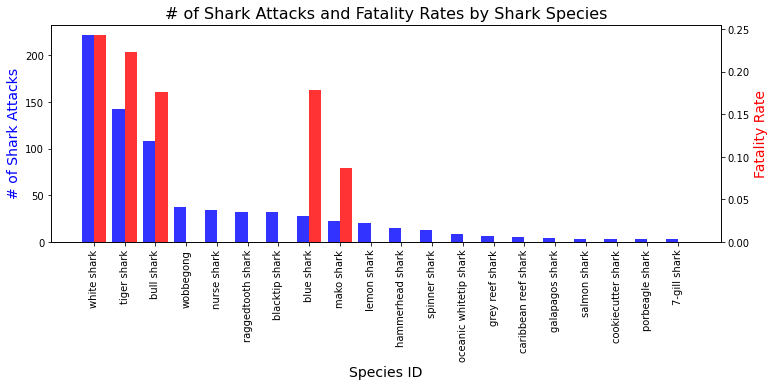

In [88]:
# Plot the number of attacks and fatality rate by species
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(species_top20['Species ID'], species_top20['Count'], color="blue", alpha=0.8, width=-0.4, align='edge')
ax.set_xlabel("Species ID",fontsize=14)
ax.set_ylabel("# of Shark Attacks",color="blue",fontsize=14)
ax.tick_params(axis='x', labelrotation = 90)
ax2=ax.twinx()
ax2.bar(species_top20['Species ID'], species_top20['Fatality Rate'],color="red", alpha=0.8, width=0.4, align='edge')
ax2.set_ylabel("Fatality Rate",color="red",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Shark Species', fontsize=16)
plt.show()

The White Shark had more attacks attributed to it (222), the Tiger Shark (143 attacks). The White Shark also have the highest fatality rate (24% for the White Shark and 22% for the Tiger Shark). The next highest fatality rate came from Blue Shark, at ~18%, with 5 of 28 attacks leading to a human death.

Of course, these numbers should be taken as a sample only, since, about 4965 of the attacks (~19% fatality rate),the shark species was not identified (TBD). Also, for this analysis, we assumed that any of the records with an 'unknown' entry for the 'Fatal (Y/N)' column were not fatal. Assuredly, the number of attacks and fatality counts for several of these shark species would be higher if more, or all, sharks were identified in those attacks.

Before moving on, let's take a quick look at some of the species identified with the most attacks and their values in the 'Fatal (Y/N)' column.

In [113]:
white = df[df['Species ID'] == 'white shark']
print('White Shark', '\n', white['Fatal (Y/N)'].value_counts(), '\n')

tiger = df[df['Species ID'] == 'tiger shark']
print('Tiger Shark', '\n', tiger['Fatal (Y/N)'].value_counts(), '\n')

bull = df[df['Species ID'] == 'bull shark']
print('Bull Shark', '\n', bull['Fatal (Y/N)'].value_counts())




White Shark 
 N          162
Y           54
UNKNOWN      6
Name: Fatal (Y/N), dtype: int64 

Tiger Shark 
 N          109
Y           32
UNKNOWN      2
Name: Fatal (Y/N), dtype: int64 

Bull Shark 
 N    89
Y    19
Name: Fatal (Y/N), dtype: int64


Based on this output, only 6 of the 162 attacks by White Sharks did not have a definite fatality or non-fatality value. For the Tiger Shark, only 2 of the 109 were unknown. Based on this information, assuming the 'unknown' fatality values were non-fatal, the final fatality rates wouldn't have changed significantly for these species. Again, with so many unknowns (species ID, fatality, etc.) in these records, we're looking for trends more so than exact numbers.

**Activity of Humans During Shark Attacks**

Let's take a look at what the humans were doing during the shark attacks. This information is documented in the 'Activity' column of the GSAF dataset. Like the some of other text-based columns, quite a bit of cleanup in this information is expected.

In [114]:
df['Activity'].describe()

count        5276
unique       1310
top       Surfing
freq         1022
Name: Activity, dtype: object

The 'Activity' column has 5276 records with 1310 unique entries, and the most numerous is, unsurprisingly, surfing (1022 attacks).

In [115]:
df['Activity'].value_counts(dropna=False).head(30)

Surfing               1022
Swimming               813
NaN                    442
Fishing                405
Spearfishing           345
Wading                 151
Diving                 111
Snorkeling              99
Standing                96
Scuba diving            79
Bathing                 76
Body boarding           62
Body surfing            50
Kayaking                37
Boogie boarding         36
Treading water          32
Free diving             29
Pearl diving            22
Surf skiing             20
Windsurfing             19
Floating                18
Boogie Boarding         17
Walking                 17
Shark fishing           14
Surf fishing            13
Rowing                  12
Surf-skiing             12
Kayak Fishing           11
Canoeing                10
Fishing for sharks      10
Name: Activity, dtype: int64

Much like some of the other columns, the 'Activity' column contains similar activities, such as Diving, Scuba Diving, Pearl diving, Freediving. Also, does "Boogie boarding" and body boarding mean the same activity? Yes, they are similar enough to each other, but different from surfing. Let's clean up some of the activities.

In [116]:
# Replace the null values with 'unknown' and change all the values to lowercase
df['Activity'].fillna('unknown', inplace = True)
df['Activity'] = df['Activity'].str.lower().str.replace('-',' ')
df['Activity'].value_counts().head(40)

surfing                           1022
swimming                           813
unknown                            445
fishing                            405
spearfishing                       345
wading                             151
diving                             111
snorkeling                          99
standing                            96
scuba diving                        93
bathing                             76
body boarding                       71
boogie boarding                     53
body surfing                        53
kayaking                            37
treading water                      32
surf skiing                         32
free diving                         31
pearl diving                        22
windsurfing                         19
floating                            18
walking                             17
shark fishing                       15
kayak fishing                       14
surf fishing                        14
sea disaster             

In [118]:
# Manually create a dictionary to change the original activity to a similar category
change_acts = {'diving for trochus':'diving', 'scuba diving':'diving', 'diving for abalone':'diving',
                'free diving':'freediving', 'fishing for sharks':'fishing', 'surf fishing':'fishing',
                'shark fishing':'fishing', 'kayak fishing':'fishing', 'freedom swimming':'swimming',
              'boogie boarding':'body boarding', 'body surfing':'body boarding', 'wade fishing':'fishing',
              'standing':'wading', 'bathing':'wading', 'walking':'wading', 'kayaking':'watercraft',
              'rowing':'watercraft', 'canoeing':'watercraft', 'pearl diving':'diving', 'treading water':'swimming',
              'surf skiing':'surfing', 'floating':'swimming', 'skindiving':'snorkeling', 'kite surfing':'surfing',
              'spearfishing on scuba':'spearfishing', 'stand up paddleboarding':'paddle boarding',
              'sitting on surfboard':'surfing', 'surfing (sitting on his board)':'surfing', 'splashing':'wading',
              'kayaking / fishing':'fishing', 'free diving / spearfishing':'spearfishing', 'fishing on a boat':'fishing',
              'fishing for mackerel':'fishing', 'free diving for abalone':'freediving', 'spearfishing / free diving':'spearfishing',
              'spearfishing (free diving)':'spearfishing', 'sailing':'boat', 'scuba diving (submerged)':'diving',
              'scuba diving (but on surface)':'diving', 'playing':'wading', 'paddling on surfboard':'surfing',
              'skin diving':'snorkeling', 'free diving & spearfishing':'spearfishing'}
df['Activity'].astype(str)
df['Activity'].replace(change_acts, value=None, inplace=True)
df['Activity'].value_counts().head(30)

surfing                    1085
swimming                    872
fishing                     482
unknown                     445
spearfishing                370
wading                      354
diving                      250
body boarding               177
snorkeling                  109
watercraft                   62
freediving                   48
windsurfing                  19
paddle boarding              18
sea disaster                 13
boat                         10
fell overboard                9
feeding sharks                5
kite boarding                 5
paddleskiing                  5
shell diving                  4
air disaster                  4
shipwreck                     4
lifesaving drill              4
jumped into the water         4
murder                        4
tagging sharks                4
floating on his back          4
diving for beche de mer       4
jumping                       4
sponge diving                 4
Name: Activity, dtype: int64

There are still a variety of activities, but we're just looking for generalities of the most common types. We've combined a lot of the different activities, so lets' see the top 15 activities.

In [119]:
df['Activity'].value_counts().head(15)

surfing            1085
swimming            872
fishing             482
unknown             445
spearfishing        370
wading              354
diving              250
body boarding       177
snorkeling          109
watercraft           62
freediving           48
windsurfing          19
paddle boarding      18
sea disaster         13
boat                 10
Name: Activity, dtype: int64

In [121]:
df['Activity'].value_counts(normalize=True).head(15)*100

surfing            18.975166
swimming           15.250087
fishing             8.429521
unknown             7.782441
spearfishing        6.470794
wading              6.190976
diving              4.372158
body boarding       3.095488
snorkeling          1.906261
watercraft          1.084295
freediving          0.839454
windsurfing         0.332284
paddle boarding     0.314795
sea disaster        0.227352
boat                0.174886
Name: Activity, dtype: float64

There still seems to be some overlap between activities. For example, should fishing and spearfishing be counted as the same? What about swimming and wading? Body boarding and surfing? Windsurfing & surfing? For this analysis, we'll keep them as they are currently categorized since they are similar to, but different enough, from each other.

Based on the current results, the highest number of attacks occurred on surfers (19%), followed closely by swimmers (15%). Fishing comes in at number 3 with 8.4%

**Provoked Versus Unprovoked Shark Attacks by Human Activity**

With Surfing being the most common human acitivity for all shark attacks, let's take a look at which human activities are the most common for provoked and unprovoked shark attacks. It's doubtful that surfing would a common activity associated with provoked shark attacks, so what activities are most common with provoked attacks?

In [123]:
# Isolate only the provoked attacks
provoked = df[df['Type'] == 'Provoked']
provoked['Activity'].value_counts(normalize=True).head(15)*100

fishing                                       36.265709
spearfishing                                  10.053860
unknown                                        5.745063
diving                                         4.129264
surfing                                        2.692998
swimming                                       1.974865
wading                                         1.795332
freediving                                     1.436266
snorkeling                                     1.256732
watercraft                                     0.718133
feeding sharks                                 0.538600
seine netting                                  0.538600
teasing a shark                                0.359066
finning the shark that bit him                 0.359066
attempting to kill a shark with explosives     0.359066
Name: Activity, dtype: float64

In [124]:
provoked['Activity'].describe()

count         557
unique        189
top       fishing
freq          202
Name: Activity, dtype: object

By far, fishing was the most dominant human activity for provoked attacks (36%). Second was spearfishing at 10%. It's not surprising that those two acitivities account for 46% of of the provoked attacks. Further research into these activities may be beneficial. There were 189 unique entries for human activity, so let's take a look at the unique values.

In [125]:
provoked['Activity'].unique()

array(['swimming', 'fishing', 'feeding sharks', 'surfing',
       'diving in shark tank', 'unknown', 'spearfishing',
       'putting hand in shark tank', 'wading', 'freediving',
       'kayak fishing for sharks', 'fishing / wading', 'touching a shark',
       'attempting to lasso a shark', 'grabbing shark for a selfie',
       'lobstering', 'teasing a shark', 'fishing for blue sharks',
       'petting a shark', 'longline fishing for sharks',
       "fishing   'tag & release'",
       'attempting to rescue an injured & beached shark',
       'diving, feeding sharks', 'fishing (illegally)', 'watercraft',
       'diving', 'standing, holding shark pup',
       'shark fishing on the ricardo astorga',
       'shark fishing on the don agustín vi.', 'snorkeling',
       'measuring sharks', 'surf fishing / wading', 'body boarding',
       "accidentally stood on hooked shark's tail before attempting to gut it",
       'fishing for snapper', 'removing hook from shark',
       'reviving a sedated 

The 189 unique entries for human activity for provoked attacks could probably be combined into fewer categories, based on the listing of them. Just from a quick glance at many of these, it looks like fishing is mentioned in the text numerous times in this column. Therefore, we can safely assume that the fishing activity was responsible for much more than the 36% of provoked shark attacks. The bottomline is that fishing is the major human activity ocurring during provoked shark attacks.

In [126]:
unprovoked = df[df['Type'] == 'Unprovoked']
unprovoked['Activity'].value_counts(normalize=True).head(15)*100

surfing            24.501561
swimming           18.496277
wading              7.758828
spearfishing        6.701898
unknown             6.461686
diving              4.732164
body boarding       3.987509
fishing             3.146769
snorkeling          2.354072
freediving          0.840740
windsurfing         0.456402
paddle boarding     0.432380
watercraft          0.288254
fell overboard      0.192169
kite boarding       0.120106
Name: Activity, dtype: float64

As expected, surfing (24.5%) and swimming (18.5%) were the most common human activities occurring during unprovoked shark attacks.

**Fatality by Human Activity**

Are there certain human activities that lead to a greater fatality rate? Let's take a look at the fatality rates for the documented human activities.

In [127]:
# Create a fatality dataframe by human activity
act_fatal = df.groupby('Activity')['Fatal'].sum()
act_fatal_df = pd.DataFrame(act_fatal)
act_fatal_df.columns = ['Fatal']
act_fatal_df.reset_index(inplace=True)

# Create a count of incidents dataframe by human activity
act_count = df.groupby('Activity')['Fatal'].count()
act_count_df = pd.DataFrame(act_count)
act_count_df.columns = ['Count']
act_count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
act_fatal_df = pd.merge(act_fatal_df, act_count_df, how = 'left', on = 'Activity')
print(act_fatal_df)

                                               Activity  Fatal  Count
0     "climbing up to ship after repairing the stern...      1      1
1     "flying tiger" transport plane went down with ...      1      2
2                             "riding waves on a board"      0      1
3                                 "swimming vigorously"      0      1
4                                                     .      1      3
...                                                 ...    ...    ...
1225                          wreck of the tug magellan      1      1
1226   yacht gooney bird foundered, 4 survivors on raft      0      1
1227                   yacht of michael howell capsized      1      1
1228                                         yacht race      0      1
1229  zosimo & his son, jeffrey popa, failed to retu...      0      1

[1230 rows x 3 columns]


In [128]:
# Calcualate a fatility rate by activity
act_fatal_df['Fatality Rate'] = act_fatal_df['Fatal'] / act_fatal_df['Count']
print(act_fatal_df)

                                               Activity  ...  Fatality Rate
0     "climbing up to ship after repairing the stern...  ...       1.000000
1     "flying tiger" transport plane went down with ...  ...       0.500000
2                             "riding waves on a board"  ...       0.000000
3                                 "swimming vigorously"  ...       0.000000
4                                                     .  ...       0.333333
...                                                 ...  ...            ...
1225                          wreck of the tug magellan  ...       1.000000
1226   yacht gooney bird foundered, 4 survivors on raft  ...       0.000000
1227                   yacht of michael howell capsized  ...       1.000000
1228                                         yacht race  ...       0.000000
1229  zosimo & his son, jeffrey popa, failed to retu...  ...       0.000000

[1230 rows x 4 columns]


In [136]:
# Reverse the sorting of the activities for horizontal bar chart
act_top15_h = act_fatal_df.sort_values(by=['Count'],ascending=False, ignore_index=True)[0:15]
print(act_top15_h)

           Activity  Fatal  Count  Fatality Rate
0           surfing     49   1085       0.045161
1          swimming    263    872       0.301606
2           fishing     37    482       0.076763
3           unknown     73    445       0.164045
4      spearfishing     49    370       0.132432
5            wading     58    354       0.163842
6            diving     38    250       0.152000
7     body boarding     25    177       0.141243
8        snorkeling     18    109       0.165138
9        watercraft      3     62       0.048387
10       freediving      7     48       0.145833
11      windsurfing      3     19       0.157895
12  paddle boarding      0     18       0.000000
13     sea disaster      6     13       0.461538
14             boat      0     10       0.000000


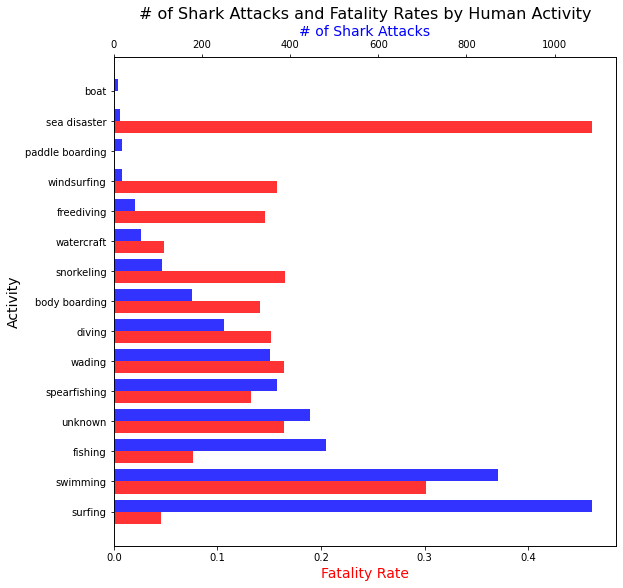

In [137]:
# Plot the number of shark attacks and fatality rate versus the human activity
fig,ax = plt.subplots(figsize=(9,9))
ax.barh(act_top15_h['Activity'], act_top15_h['Fatality Rate'],color="red", height=-0.4, alpha=0.8, align='edge')
ax.set_xlabel("Fatality Rate",color="red",fontsize=14)
ax.set_ylabel("Activity",fontsize=14)
ax2=ax.twiny()
ax2.barh(act_top15_h['Activity'], act_top15_h['Count'], color="blue", height=0.4, alpha=0.8, align='edge')
ax2.set_xlabel("# of Shark Attacks",color="blue",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Human Activity', fontsize=16)
plt.show()

Surfing was the activity that shows the highest number of shark attacks worldwide, at ~19%, followed by swimming at ~15%. However, the highest fatality rate was the sea disaster activity, at ~46%, but the number of attacks for that activity was quite low (13, with 6 being fatal). Of the higher number of attacks (>50), swimming had the highest fatality rate (30%).

**Summary and Future Efforts**

The Global Shark Attack File dataset provided a good review of data cleaning, analysis and visualization. The disadvantage to this dataset was the lack of metadata or any explanations of the information found in the dataset. Here is a quick rundown of the results of the analysis of shark attacks since 1900:

Type of attack - nearly 73% were unprovoked, with just under 10% were identified as being a provoked incident. In other words, the majority of shark attacks occur on unsuspecting humans.

Fatalities - worldwide, approximately 18% of the shark attacks were fatal. While the USA had the most recorded shark attacks, it also had the third lowest fatality rate (6%). Australia had the second most number of attacks, but its fatality rate matched that of the worldwide rate - 18%.

Shark species involved - while there are over 5000 records of shark attacks since 1900, about 1000 had an identifiable shark species documented. Of those, the White Shark had the highest number of attacks (222) and the second highest fatality rate (24%). The Tiger Shark was second in number of attacks (143), but first in fatality rate (22%).

Human Activity - surfing was the most popular human activity documented in the dataset, with over 1000 occurrences. Conversely, the fatality rate for surfers was relatively low - 4.5%. Swimming was the second most common, and the fatality rate was the second highest - 30%. Therefore, surfers are more likely to get bit by a shark, but swimmers were much more likely to die from a shark attack

In [138]:
# Export cleaned GSAF dataset
#df.to_csv(r'C:\Users\hp\Desktop\Data Science\Personal Projects\Global Shark Attack\GSAF5_cleaned.csv', index=False)